<a href="https://colab.research.google.com/github/dmika1234/dl_uwr/blob/develop/Assignments/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 07.03.2023
- get at least another **2** points (see problem 8) by Tuesday, 14.03.2023 
- remaining points: last lab session before or on Thursday, <s>16</s>23.03.2023

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).
Make sure you know all the questions and asnwers, and that the notebook contains results; bfore presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (that they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

## Problem 8 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [3]:
import matplotlib.pyplot as plt
import numpy as np

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

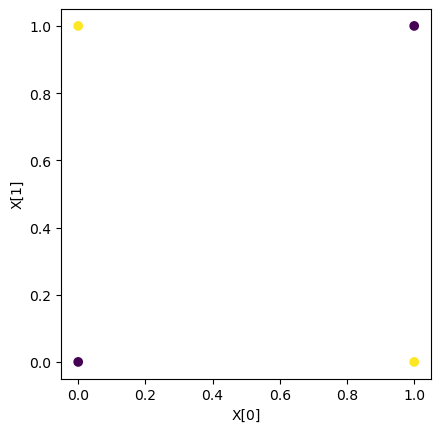

In [4]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(sigmoid):
    return sigmoid*(1 - sigmoid)


class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32, random_params=False):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        if random_params:
            self.init_params(num_hidden, in_features)

    def init_params(self, num_hidden, in_features):
        # TODO for Problem 2:
        self.W1 = np.array(np.random.normal(0, 0.5, num_hidden * in_features)).reshape(num_hidden, in_features)
        self.b1 = np.array(np.random.normal(0, 0.5, num_hidden))
        self.W2 = np.array(np.random.normal(0, 0.5, num_hidden)).reshape(1, num_hidden)
        self.b2 = np.array(np.random.normal(0, 0.5, 1)).reshape(1, )
        

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation
        
        # Input to neurons in 1st layer
        A1 = np.dot(X, self.W1.T) + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = np.dot(O1, self.W2.T) + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -(Y*np.log(O2) + (1 - Y)*np.log(1-O2))
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
        #     # TODO in Problem 2:
        #     # fill in the gradient computation
        #     # Please note, that there is a correspondance between
        #     # the forward and backward pass: with backward computations happening
        #     # in reverse order.
        #     # We save the gradients with respect to the parameters as fields of self.
        #     # It is not very elegant, but simplifies training code later on.

        #     # A2_grad is the gradient of loss with respect to A2
        #     # Hint: there is a concise formula for the gradient
        #     # of logistic sigmoid and cross-entropy loss
            # O2_grad = (1-Y)/(1-O2)- Y / O2
            # A2_grad = O2_grad * sigmoid_grad(O2)
            A2_grad = (1-Y)*O2 - Y*(1 - O2)
            self.b2_grad = A2_grad.sum(0) / A2_grad.shape[0]
            self.W2_grad = np.dot(A2_grad.T, O1) / A2_grad.shape[0]
            O1_grad = np.dot(A2_grad, self.W2)
            A1_grad = O1_grad * sigmoid_grad(O1)
            self.b1_grad = A1_grad.sum(0) / A1_grad.shape[0]
            self.W1_grad = np.dot(A1_grad.T, X) / A1_grad.shape[0]

        return O2, loss
    
    def train(self, X, Y, alpha=0.01, verbose=False):
        for i in range(100000):
            _, loss = self.forward(X, Y, do_backward=True)
            if (i % 5000) == 0 and verbose:
                print(f"after {i} steps \tloss={loss}")
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(self, param_name)
                # grad = getattr(net, param_name + '_grad')
                # Hint: use the construct `param[:]` to change the contents of the array!
                # Doing instead `param = new_val` simply changes to what the variable
                # param points to, without affecting the network!
                # alternatively, you could do setattr(net, param_name, new_value)
                # setattr(net, param_name, param - alpha * grad)
                param[:] = param - alpha * getattr(self, param_name + '_grad')
        return loss


In [4]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=np.float64)
net.W1 = np.array([[4, -1], 
                   [-1, 4]])
net.b1 = np.array([[2, 2]])
net.W2 = np.array([[-355, -355]])
net.b2 = np.array([[622]])

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.033377521036703564
XORnet([0. 1.]) = 0.9997641281023015
XORnet([1. 0.]) = 0.9997641281023015
XORnet([1. 1.]) = 7.0116468141944155e-37


## Problem 2

In [6]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
        
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [58]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64, random_params=True)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [117]:
net = SmallNet(2, 10, dtype=np.float64, random_params=True)
net.train(X, Y, 0.01, verbose=True)

after 0 steps 	loss=0.8684305979084279
after 5000 steps 	loss=0.6651757438950536
after 10000 steps 	loss=0.5987843548727496
after 15000 steps 	loss=0.47258534317314804
after 20000 steps 	loss=0.3331954848887876
after 25000 steps 	loss=0.213025610582801
after 30000 steps 	loss=0.13252809368948704
after 35000 steps 	loss=0.08582928779027563
after 40000 steps 	loss=0.059202871626191214
after 45000 steps 	loss=0.043348235579622266
after 50000 steps 	loss=0.03332949896281161
after 55000 steps 	loss=0.026629766478168365
after 60000 steps 	loss=0.021926468295220707
after 65000 steps 	loss=0.01848863849202746
after 70000 steps 	loss=0.015890525908831877
after 75000 steps 	loss=0.013871874302554658
after 80000 steps 	loss=0.012266651306180303
after 85000 steps 	loss=0.010964919994180011
after 90000 steps 	loss=0.009891494914026952
after 95000 steps 	loss=0.008993489165635443


0.008232914411577724

In [118]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.005824781319872465
XORnet([0. 1.]) = 0.9920641545320984
XORnet([1. 0.]) = 0.9909555392776065
XORnet([1. 1.]) = 0.009985978076874272


In [16]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.

X3 = np.array([[0, 0, 0], [0, 0, 1], 
               [0, 1, 0], [0, 1, 1],
               [1, 0, 0], [1, 0, 1],
               [1, 1, 0], [1, 1, 1]], dtype=np.float64)
Y3 = np.array([0, 1, 1, 0, 1, 0, 0, 1], dtype=np.float64).reshape(-1, 1)

for hidden_dim in [2, 3, 5, 10, 20]:
    net = SmallNet(3, hidden_dim, dtype=np.float64, random_params=True)
    loss = net.train(X3, Y3, 0.01, verbose=False)
    print(f"Last loss for {hidden_dim}:  {loss:.3f}")
    

Last loss for 2:  0.693
Last loss for 3:  0.053
Last loss for 5:  0.118
Last loss for 10:  0.028
Last loss for 20:  0.020


## Problem 4


In [20]:
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return (x > 0)

class SmallNetv2:
    def __init__(self, in_features, num_hidden, num_layers, dtype=np.float32, random_params=True):
        self.num_layers = num_layers
        if random_params:
            self.init_params(num_hidden, in_features, dtype)

    def init_params(self, num_hidden, in_features, dtype=np.float32):
        self.W = []
        self.b = []
        if self.num_layers > 1:
            self.W.append(np.array(np.random.normal(0, 0.5, num_hidden * in_features), dtype=dtype).reshape(num_hidden, in_features))
            self.b.append(np.array(np.random.normal(0, 0.5, num_hidden), dtype=dtype))
            for i in np.arange(self.num_layers-2):
                self.W.append(np.array(np.random.normal(0, 0.5, num_hidden ** 2), dtype=dtype).reshape(num_hidden, num_hidden))
                self.b.append(np.array(np.random.normal(0, 0.5, num_hidden), dtype=dtype)) 

            self.W.append(np.array(np.random.normal(0, 0.5, num_hidden), dtype=dtype).reshape(1, num_hidden))
            self.b.append(np.array(np.random.normal(0, 0.5, 1), dtype=dtype).reshape(1, ))
        else:
            self.W.append(np.array(np.random.normal(0, 0.5, num_hidden * in_features), dtype=dtype).reshape(num_hidden, in_features))
            self.b.append(np.array(np.random.normal(0, 0.5, num_hidden), dtype=dtype))
        

    def forward(self, X, Y=None, do_backward=False, activation=sigmoid, activation_grad=sigmoid_grad):
        A = []
        O = []

        A.append(np.dot(X, self.W[0].T) + self.b[0])
        O.append(activation(A[0]))
        for i in np.arange(self.num_layers - 1):
            A.append(np.dot(O[i], self.W[i+1].T) + self.b[i+1])
            if i == self.num_layers-2:
                O.append(sigmoid(A[i+1]))
            else:
                O.append(activation(A[i+1]))

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -(Y*np.log(O[-1]) + (1 - Y)*np.log(1-O[-1]))
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            self.W_grad = []
            self.b_grad = []
            A_grad = []
            O_grad = []
            
            O_grad.append((1-Y)/(1-O[-1])- Y / O[-1])
            A_grad.append((1-Y)*O[-1] - Y*(1 - O[-1]))
            self.b_grad.append(A_grad[0].sum(0) / A_grad[0].shape[0])
            self.W_grad.append(np.dot(A_grad[0].T, O[-2]) / A_grad[0].shape[0])
            
            for i in np.arange(self.num_layers-2):
                O_grad.append(np.dot(A_grad[-1], self.W[-(i+1)]))
                A_grad.append(O_grad[-1] * activation_grad(O[-i-1]))
                self.b_grad.append(A_grad[-1].sum(0) / A_grad[-1].shape[0])
                self.W_grad.append(np.dot(A_grad[-1].T, O[-i-2]) / A_grad[-1].shape[0])

            O_grad.append(np.dot(A_grad[-1], self.W[1]))
            A_grad.append(O_grad[-1] * activation_grad(O[0]))
            self.b_grad.append(A_grad[-1].sum(0) / A_grad[-1].shape[0])
            self.W_grad.append(np.dot(A_grad[-1].T, X) / A_grad[-1].shape[0])
            self.b_grad.reverse()
            self.W_grad.reverse()
        return O[-1], loss
    
    def train(self, X, Y, alpha=0.01, verbose=False, activation=sigmoid, activation_grad=sigmoid_grad):
        for i in range(100000):
            _, loss = self.forward(X, Y, do_backward=True, activation=activation, activation_grad=activation_grad)
            if (i % 5000) == 0 and verbose:
                print(f"after {i} steps \tloss={loss}")
            for layer in np.arange(self.num_layers):
                self.W[layer] = self.W[layer] - alpha * self.W_grad[layer]
                self.b[layer] = self.b[layer] - alpha * self.b_grad[layer]
        return loss


In [21]:
for hidden_dim in [2, 3, 5, 10, 20]:
    net = SmallNetv2(3, hidden_dim, 2, random_params=True, dtype=np.float64)
    loss = net.train(X3, Y3, alpha=0.01, verbose=False, activation=relu, activation_grad=relu_grad)
    print(f"Last loss for {hidden_dim}:  {loss:.3f}")

Last loss for 2:  0.541
Last loss for 3:  0.541
Last loss for 5:  0.693
Last loss for 10:  0.003
Last loss for 20:  0.002


## Problem 5

In [24]:
hidden_dim = 10
net = SmallNetv2(3, hidden_dim, 3, random_params=True, dtype=np.float64)
loss = net.train(X3, Y3, alpha=0.1, verbose=True)
print(f"Last loss for {hidden_dim}:  {loss:.3f}")

after 0 steps 	loss=0.7585930909859477
after 5000 steps 	loss=0.6877739986886484
after 10000 steps 	loss=0.5184890752655749
after 15000 steps 	loss=0.017129733355128254
after 20000 steps 	loss=0.008134093178626975
after 25000 steps 	loss=0.0054108300157144715
after 30000 steps 	loss=0.004076947326836798
after 35000 steps 	loss=0.003280380864699832
after 40000 steps 	loss=0.002749081008779951
after 45000 steps 	loss=0.0023686407371481836
after 50000 steps 	loss=0.002082378557103843
after 55000 steps 	loss=0.0018589428845548124
after 60000 steps 	loss=0.0016795566437320894
after 65000 steps 	loss=0.0015322743423403498
after 70000 steps 	loss=0.001409127449444025
after 75000 steps 	loss=0.0013045928163495388
after 80000 steps 	loss=0.0012147193280730754
after 85000 steps 	loss=0.0011366044636612878
after 90000 steps 	loss=0.0010680672703308892
after 95000 steps 	loss=0.0010074367323172435
Last loss for 10:  0.001


## Problem 6

In [42]:
from itertools import product
import pandas as pd
from tqdm import tqdm

In [43]:
hidden_dim_vec = [2, 3, 6, 11]
hidden_layers_vec = [2, 3, 5, 10]
activation = ['sigmoid', 'relu']

In [44]:
res6 = pd.DataFrame(list(product([0], hidden_dim_vec, hidden_layers_vec, activation)), columns=['Loss', 'Hidden_dim', 'Hidden_layers', 'Activation'])

In [45]:
for ix, row in tqdm(res6.iterrows()):
    _, hidden_dim, hidden_layers, activation = row
    net = SmallNetv2(3, hidden_dim, hidden_layers, random_params=True, dtype=np.float64)
    if activation == 'sigmoid':
        loss = net.train(X3, Y3, alpha=0.1, verbose=False)
    else:
        loss = net.train(X3, Y3, alpha=0.01, verbose=False, activation=relu, activation_grad=relu_grad)
    res6.iloc[ix, 0] = loss

21it [07:38, 20.11s/it]C:\Users\dmika\AppData\Local\Temp\ipykernel_18280\2860047986.py:45: RuntimeWarning: divide by zero encountered in log
  loss = -(Y*np.log(O[-1]) + (1 - Y)*np.log(1-O[-1]))
C:\Users\dmika\AppData\Local\Temp\ipykernel_18280\2860047986.py:45: RuntimeWarning: invalid value encountered in multiply
  loss = -(Y*np.log(O[-1]) + (1 - Y)*np.log(1-O[-1]))
C:\Users\dmika\AppData\Local\Temp\ipykernel_18280\2860047986.py:57: RuntimeWarning: divide by zero encountered in divide
  O_grad.append((1-Y)/(1-O[-1])- Y / O[-1])
C:\Users\dmika\AppData\Local\Temp\ipykernel_18280\2860047986.py:57: RuntimeWarning: invalid value encountered in divide
  O_grad.append((1-Y)/(1-O[-1])- Y / O[-1])
29it [10:48, 20.98s/it]C:\Users\dmika\AppData\Local\Temp\ipykernel_18280\3661443212.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\dmika\AppData\Local\Temp\ipykernel_18280\2860047986.py:64: RuntimeWarning: invalid value encountered in multiply
  A_grad.appen

In [47]:
res6.to_csv('A1r6.csv', index=False)

## Problem 7

## Problem 8

We know that softmax function takes $k$ inputs and returns $k$ outputs. So this derivative will be $k\times k$ matrix.
To get the whole result we will first calculate coordinate derivatives.
Lets denote 
$\mathrm{softmax}(\boldsymbol z) = [s_1, s_2, \ldots,  s_k]^T$
and 
$\boldsymbol z = [z_1, z_2, \ldots,  z_k]^T$

First we will calculate derivatives on the diagonal.

$$\frac{\partial s_j}{\partial z_j} = \frac{\exp{(z_j)}\sum_{i=1}^k\exp{(z_j)}-(\exp{(z_j)})^2}{(\sum_{i=1}^k\exp{(z_i)})^2} = \frac{\exp{(z_j)}}{\sum_{i=1}^k\exp{(z_i)}} - \left(\frac{\exp{(z_j)}}{\sum_{i=1}^k\exp{(z_i)}}\right)^2=s_j-s_j^2$$

Then we calculate it for $i\neq j$.

$$\frac{\partial s_i}{\partial z_j} = -\frac{\exp{(z_i)}\exp{(z_j)}}{(\sum_{i=1}^k\exp{(z_i)})^2} = -s_i\cdot s_j$$

Combining those results we actually get the following:

$$\frac{\partial \hat{\boldsymbol y}}{\boldsymbol z}=\mathrm{diag}( \hat{\boldsymbol y}) - \hat{\boldsymbol y} \hat{\boldsymbol y}^T.$$

To get the next two derivatives we need to use the chain rule.

$$\frac{\partial \hat{\boldsymbol y}}{W_{ij}}=\frac{\partial \hat{\boldsymbol y}}{\boldsymbol z}\cdot\frac{\partial \boldsymbol z}{W_{ij}}$$

So we just need to calculate $\frac{\partial \boldsymbol z}{W_{ij}}$. The result should be a vector with $k$ elements.

$$\frac{\partial \boldsymbol z}{W_{ij}} = [0,\ldots,0,x_j,0,\ldots,0]$$

Where $x_j$ is in the $i$-th place of this vector.


$$\frac{\partial \hat{\boldsymbol y}}{\boldsymbol b}=\frac{\partial \hat{\boldsymbol y}}{\boldsymbol z}\cdot\frac{\partial \boldsymbol z}{\boldsymbol b}$$

$$\frac{\partial \boldsymbol z}{\boldsymbol b} = \mathbf{I}_{k\times k}$$